In [1]:
import json
import serial
import numpy as np
import matplotlib.pylab as plt

## Constant Control

In [ ]:
with serial.Serial('/dev/cu.usbmodem99856601', 115200) as conn:

    conn.write(json.dumps({"servo": 1, "ctrl":0.1, "log": True}).encode('utf-8'))
    print(conn.read_until(b'ok\r\n'))

    buf = conn.read(201*5*4)
    conn.write(json.dumps({"servo": 1, "ctrl":0, "log": False}).encode('utf-8'))
    print(conn.read_until(b'ok\r\n'))

    data = np.frombuffer(buf, dtype='u4,u4,f4,f4,f4')
data

## Sine Wave Control

In [22]:
with serial.Serial('/dev/cu.usbmodem99856601', 115200) as conn:

    # conn.write(json.dumps({"servo": 1, "ctrl":0.1, "log": True}).encode('utf-8'))
    conn.write(json.dumps({"servo": 1, "sineA":1, "sineF":1, "log": True}).encode('utf-8'))
    print(conn.read_until(b'ok\r\n'))

    buf = conn.read(201*5*4)
    conn.write(json.dumps({"servo": 1, "ctrl":0, "log": False}).encode('utf-8'))
    print(conn.read_until(b'ok\r\n'))

    data = np.frombuffer(buf, dtype='u4,u4,f4,f4,f4')
data

b'> Servo 1\r\n  Set sine amplitude = 1.00\r\n  Set sine frequency = 1.00\r\n  Enabled logging\r\nok\r\n'
b'> Servo 1\r\n  Set ctrl = 0.00\r\n  Disabled logging\r\nok\r\n'


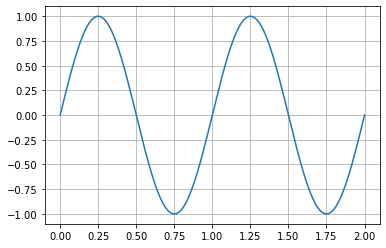

In [24]:
t = np.cumsum(data['f1']) / 1e6
t -= t[0]
t
ctrl = data['f2']

plt.plot(t, ctrl)
plt.grid()